<center><h1>1-c: SVM</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

To keep your modifications in case you want to come back later to this colab, do *File -> Save a copy in Drive*.



In [ ]:
!wget http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz

--2021-10-06 14:05:48--  http://webia.lip6.fr/~douillard/rdfia/15_scenes_Xy.npz
Resolving webia.lip6.fr (webia.lip6.fr)... 132.227.201.33
Connecting to webia.lip6.fr (webia.lip6.fr)|132.227.201.33|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [text/plain]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M  17.6MB/s    in 2.0s    

2021-10-06 14:05:50 (17.6 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [ ]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [ ]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [ ]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [ ]:
#TODO = train_test_split(#TODO)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Then a validation set from the train set:

In [ ]:
#TODO = train_test_split(#TODO)
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=1) # 0.125 x 0.8 = 0.1

Let's KFold over different values of `C`:

In [ ]:
C_values = [10**i for i in range(-3, 7)]
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')
  #TODO
  svc = SVC(C=c)
  svc.fit(X_train_sub, y_train_sub)

  # Fit on sub-train set
  # TODO
  #pred = svc.predict(X_val)
  acc = svc.score(X_val, y_val)
  accuracies.append(acc)

  # Evaluate on val set
  # TODO

  print(f'--> accuracy = {acc}')

Training SVM with C=0.001
--> accuracy = 0.10022271714922049
Training SVM with C=0.01
--> accuracy = 0.16481069042316257
Training SVM with C=0.1
--> accuracy = 0.26280623608017817
Training SVM with C=1
--> accuracy = 0.5501113585746102
Training SVM with C=10
--> accuracy = 0.6948775055679287
Training SVM with C=100
--> accuracy = 0.7238307349665924
Training SVM with C=1000
--> accuracy = 0.7216035634743875
Training SVM with C=10000
--> accuracy = 0.7216035634743875
Training SVM with C=100000
--> accuracy = 0.7216035634743875
Training SVM with C=1000000
--> accuracy = 0.7216035634743875


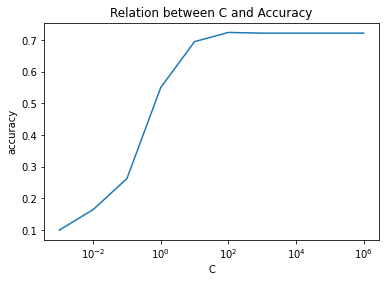

In [ ]:
#TODO plot the relation between `c` and the accuracy
plt.plot(C_values, accuracies)
plt.title('Relation between C and Accuracy')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.xscale("log")
plt.savefig('C_accuracy.png')

In [ ]:
#TODO Fit on the whole train set, evaluate on the test set 
ind = np.argmax(accuracies)  # returns first instance of max
best_C = C_values[ind]
svc = SVC(C=best_C)
svc.fit(X_train, y_train)
acc = svc.score(X_test, y_test)
print(f'--> accuracy = {acc}')

--> accuracy = 0.7346711259754738



Do the same with different kernel values, and different decision functions:

In [ ]:
# TODO
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies_kernel = []

for k in kernels:
  print(f'Training SVM with kernel={k}')
  #TODO
  svc = SVC(C=best_C, kernel=k)  # attention: we determined best_C w.r.t. the rbf Kernel...
  svc.fit(X_train_sub, y_train_sub)

  # Fit on sub-train set
  # TODO
  #pred = svc.predict(X_val)
  acc = svc.score(X_val, y_val)
  accuracies_kernel.append(acc)

  # Evaluate on val set
  # TODO

  print(f'--> accuracy = {acc}')

Training SVM with kernel=linear
--> accuracy = 0.7060133630289532
Training SVM with kernel=poly
--> accuracy = 0.5857461024498887
Training SVM with kernel=rbf
--> accuracy = 0.7238307349665924
Training SVM with kernel=sigmoid
--> accuracy = 0.10690423162583519


In [ ]:
# TODO
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracies_kernel_C_accuracies = {}
strategies = ['ovo', 'ovr']
accuracies_strategy = []

for k in kernels:
  accuracies_kernel_C_accuracies[k] = {}
  for c in C_values:
    accuracies_kernel_C_accuracies[k][c] = {}
    for s in strategies:
      print('Training SVM with kernel {}, C {}, strategy {}'.format(k, c, s))
      #TODO
      svc = SVC(C=c, kernel=k, decision_function_shape=s)  # attention: we determined best_C w.r.t. the rbf Kernel...
      svc.fit(X_train_sub, y_train_sub)

      # Fit on sub-train set
      # TODO
      #pred = svc.predict(X_val)
      acc = svc.score(X_val, y_val)
      accuracies_kernel_C_accuracies[k][c][s] = acc

      # Evaluate on val set
      # TODO

      print(f'--> accuracy = {acc}')

Training SVM with kernel linear, C 0.001, strategy ovo
--> accuracy = 0.732739420935412
Training SVM with kernel linear, C 0.001, strategy ovr
--> accuracy = 0.732739420935412
Training SVM with kernel linear, C 0.01, strategy ovo
--> accuracy = 0.7060133630289532
Training SVM with kernel linear, C 0.01, strategy ovr
--> accuracy = 0.7060133630289532
Training SVM with kernel linear, C 0.1, strategy ovo
--> accuracy = 0.7060133630289532
Training SVM with kernel linear, C 0.1, strategy ovr
--> accuracy = 0.7060133630289532
Training SVM with kernel linear, C 1, strategy ovo
--> accuracy = 0.7060133630289532
Training SVM with kernel linear, C 1, strategy ovr
--> accuracy = 0.7060133630289532
Training SVM with kernel linear, C 10, strategy ovo
--> accuracy = 0.7060133630289532
Training SVM with kernel linear, C 10, strategy ovr
--> accuracy = 0.7060133630289532
Training SVM with kernel linear, C 100, strategy ovo
--> accuracy = 0.7060133630289532
Training SVM with kernel linear, C 100, strat

Text(0, 0.5, 'accuracy')

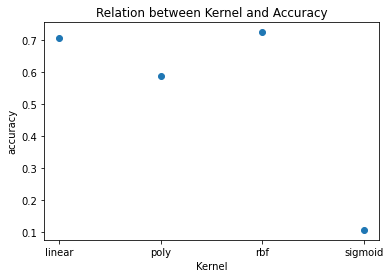

In [ ]:
plt.scatter(kernels, accuracies_kernel_C_accuracies)
plt.title('Relation between Kernel and Accuracy')
plt.xlabel('Kernel')
plt.ylabel('accuracy')

In [ ]:
ind_k = np.argmax(accuracies_kernel) 
best_k = kernels[ind_k]
svc = SVC(C=best_C, kernel=best_k)
svc.fit(X_train, y_train)
acc = svc.score(X_test, y_test)
print(f'--> accuracy = {acc}')  # This is obviously the same as above, since we chose the same C and Kernel

--> accuracy = 0.7346711259754738


In [ ]:
print(accuracies_kernel_C_accuracies.values())

{'linear': {0.001: {'ovo': 0.732739420935412, 'ovr': 0.732739420935412}, 0.01: {'ovo': 0.7060133630289532, 'ovr': 0.7060133630289532}, 0.1: {'ovo': 0.7060133630289532, 'ovr': 0.7060133630289532}, 1: {'ovo': 0.7060133630289532, 'ovr': 0.7060133630289532}, 10: {'ovo': 0.7060133630289532, 'ovr': 0.7060133630289532}, 100: {'ovo': 0.7060133630289532, 'ovr': 0.7060133630289532}, 1000: {'ovo': 0.7060133630289532, 'ovr': 0.7060133630289532}, 10000: {'ovo': 0.7060133630289532, 'ovr': 0.7060133630289532}, 100000: {'ovo': 0.7060133630289532, 'ovr': 0.7060133630289532}, 1000000: {'ovo': 0.7060133630289532, 'ovr': 0.7060133630289532}}, 'poly': {0.001: {'ovo': 0.11804008908685969, 'ovr': 0.11804008908685969}, 0.01: {'ovo': 0.133630289532294, 'ovr': 0.133630289532294}, 0.1: {'ovo': 0.19376391982182628, 'ovr': 0.19376391982182628}, 1: {'ovo': 0.3830734966592428, 'ovr': 0.3830734966592428}, 10: {'ovo': 0.49665924276169265, 'ovr': 0.49665924276169265}, 100: {'ovo': 0.5857461024498887, 'ovr': 0.585746102

In [ ]:
strategies = ['ovo', 'ovr']
accuracies_strategy = []

for s in strategies:
  print(f'Training SVM with strategy={s}')
  #TODO
  svc = SVC(C=best_C, kernel=best_k, decision_function_shape=s)  # attention: we determined best_C w.r.t. the rbf Kernel...
  svc.fit(X_train_sub, y_train_sub)

  # Fit on sub-train set
  # TODO
  #pred = svc.predict(X_val)
  acc = svc.score(X_val, y_val)
  accuracies_strategy.append(acc)

  # Evaluate on val set
  # TODO

  print(f'--> accuracy = {acc}')

Training SVM with strategy=ovo
--> accuracy = 0.7238307349665924
Training SVM with strategy=ovr
--> accuracy = 0.7238307349665924


Text(0, 0.5, 'accuracy')

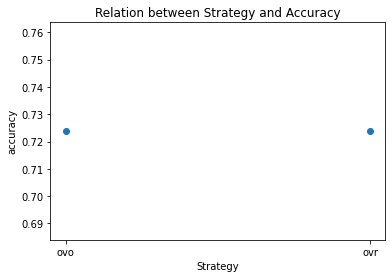

In [ ]:
plt.scatter(strategies, accuracies_strategy)
plt.title('Relation between Strategy and Accuracy')
plt.xlabel('Strategy')
plt.ylabel('accuracy')

In [ ]:
ind_s = np.argmax(accuracies_strategy) 
best_s = strategies[ind_s]
svc = SVC(C=best_C, kernel=best_k, decision_function_shape=best_s)
svc.fit(X_train, y_train)
acc = svc.score(X_test, y_test)
print(f'--> accuracy = {acc}')  

--> accuracy = 0.7346711259754738
